# Well logs visualization

In [1]:
import os
import sys
sys.path.insert(0, "..")

from petroflow import WellLogsDataset
from petroflow.batchflow import Pipeline, B

In [2]:
WELL_NPZ_PATH = "path/to/data"
ds = WellLogsDataset(path=WELL_NPZ_PATH, sort=True)

In [3]:
template_pipeline = (Pipeline()
    .add_components("mask", B("array_of_nones"))
    .load(fmt="npz", components=["dept", "logs", "mask"])
    .drop_nans(components_to_split="mask")
)

pipeline = ds >> template_pipeline

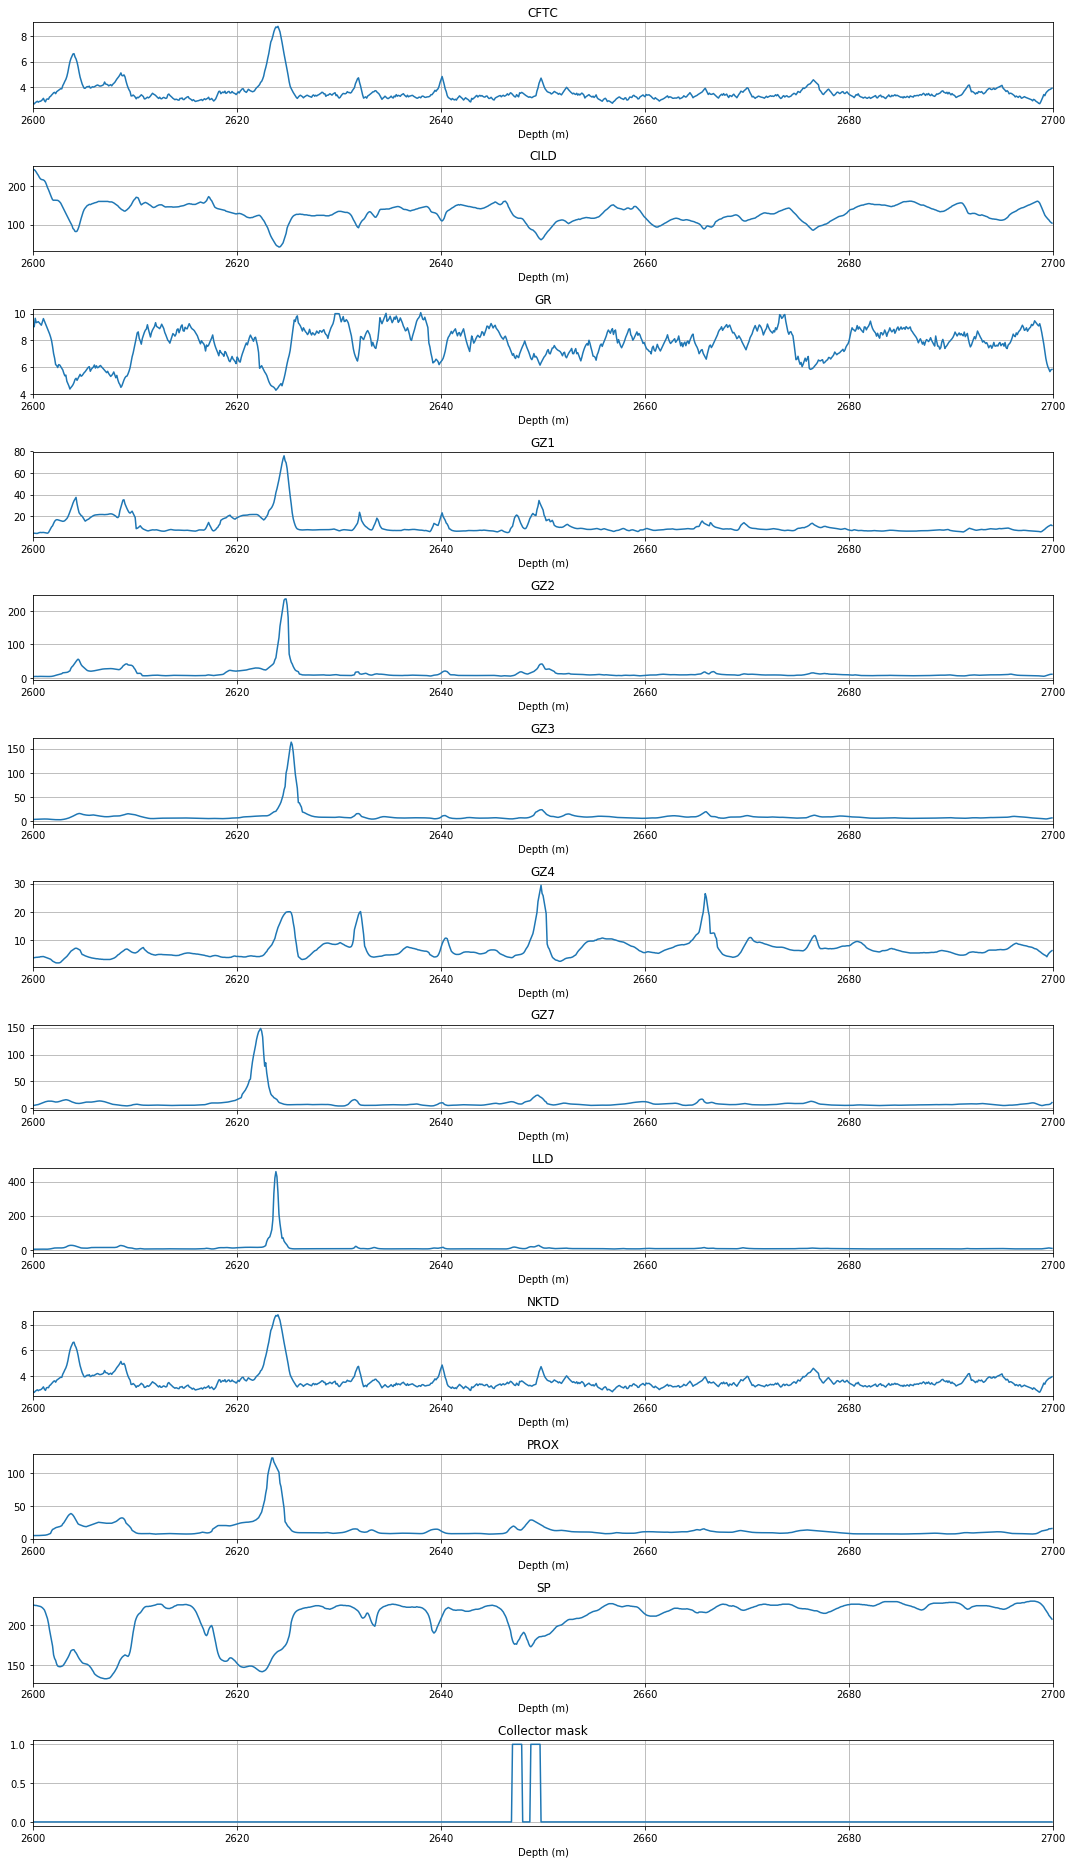

In [4]:
batch = pipeline.next_batch(1)
batch._show_logs(start=2600, end=2700, plot_mask=True)